<a href="https://colab.research.google.com/github/Ayush-Dutta/OIBSIP_DS/blob/main/Unemployment_In_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

In [2]:
data = pd.read_csv(r"/content/Unemployment in India.csv")

In [3]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data.shape

(768, 7)

In [5]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
#all column names
for i in data.columns:
    print(i)

Region
 Date
 Frequency
 Estimated Unemployment Rate (%)
 Estimated Employed
 Estimated Labour Participation Rate (%)
Area


In [10]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


Thus
* Mean Unemployment Rate: 11.79%
* Median Unemployment Rate: 8.35%
* Standard Deviation of Unemployment Rate: 10.72%

In [11]:
data.columns = data.columns.str.strip()

In [12]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [13]:
# Grouping the data by 'Date' and calculate the mean unemployment rate for each date
mean_unemployment_over_time = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
# Sort the index (dates) in ascending order
mean_unemployment_over_time = mean_unemployment_over_time.sort_index()

In [14]:
# Changing the dtype of 'Date' column

data['Date'] = pd.to_datetime(data['Date'])

# Converting 'Area' columns to categorical data type

data['Area'] = data['Area'].astype('category')

# Dropping the 'Frequency' column

data = data.drop(['Frequency'],axis = 1)

<ipython-input-14-eff7b81c9000>:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Month_Name'] = data['Month'].apply(lambda x : calendar.month_abbr[x])
# Plotting boxplot of unemployment rates by month

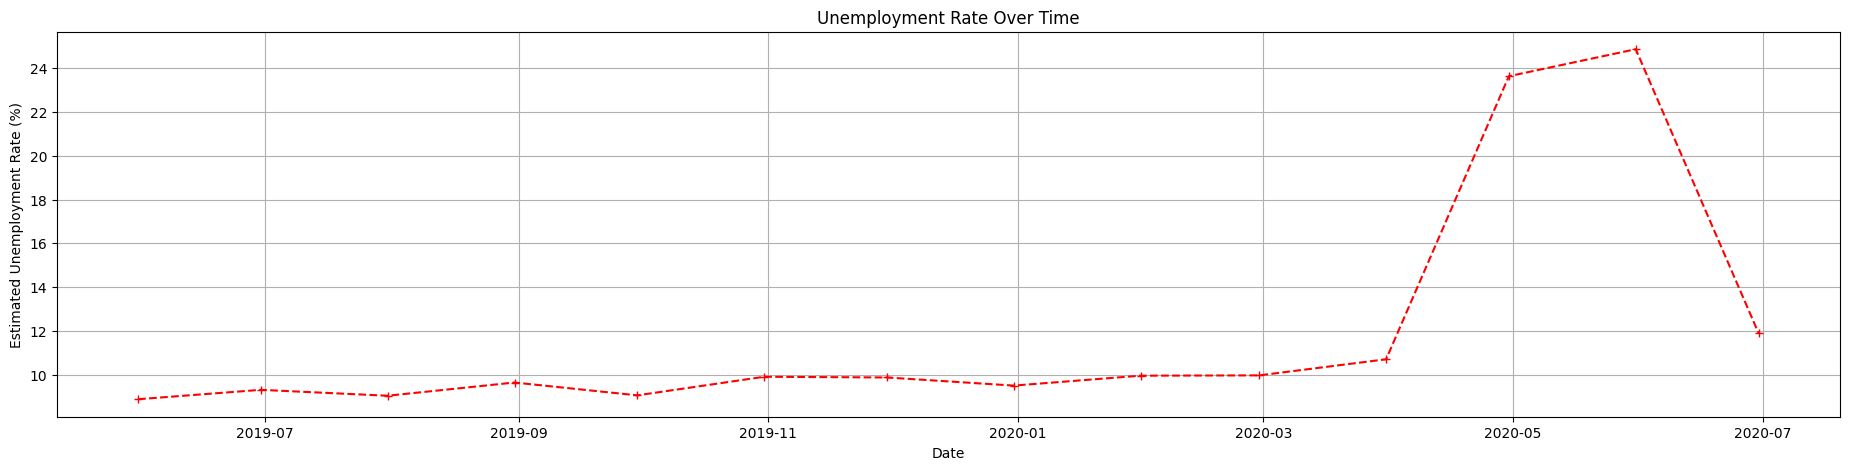

In [16]:
# Grouping the data by 'Date' and calculate the mean unemployment rate for each date
mean_unemployment_over_time = data.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
#creating a line plot
plt.figure(figsize=(23, 5))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

The plot reveals periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020.

<ipython-input-17-12f38eacb443>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unemployment_by_region.index, y=unemployment_by_region['Average Unemployment Rate (%)'], palette='viridis')


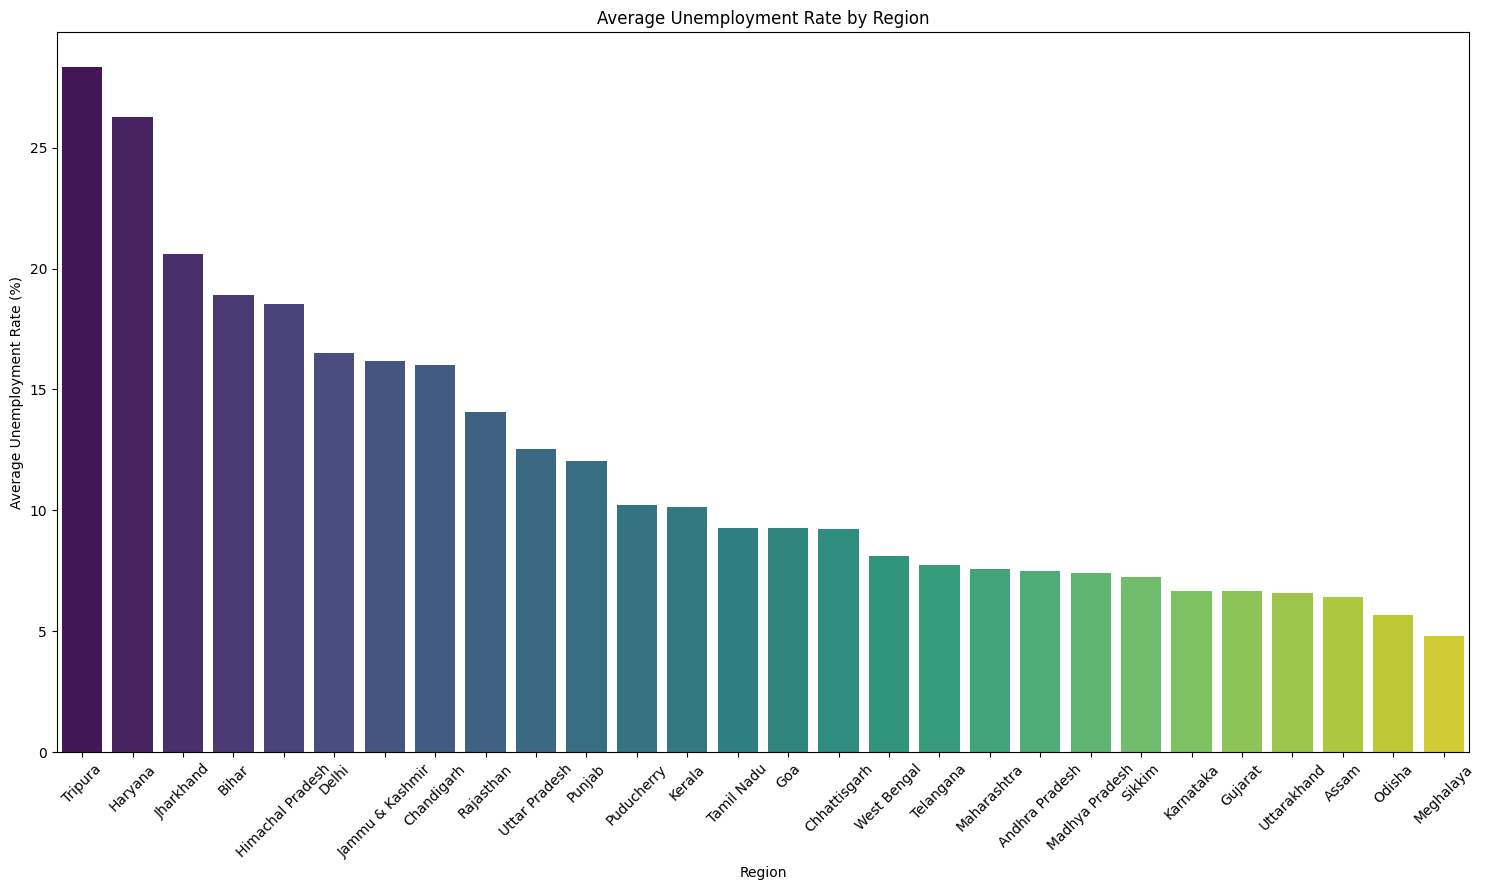

In [17]:
# Create a crosstab to get average unemployment rate by region
unemployment_by_region = pd.crosstab(data['Region'], columns='Average Unemployment Rate (%)', values=data['Estimated Unemployment Rate (%)'], aggfunc='mean')

# Sort values by average unemployment rate (descending) for better visualization
unemployment_by_region = unemployment_by_region.sort_values(by='Average Unemployment Rate (%)', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(15, 9))
sns.barplot(x=unemployment_by_region.index, y=unemployment_by_region['Average Unemployment Rate (%)'], palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Average Unemployment Rate by Region')
plt.tight_layout()
plt.show()

Overall unemployment rate was high for

* Tripura
* Haryana
* Jharkhand
* Bihar


Overall Lowest unemployment rate was for

* Meghalaya
* Odisha
* Assam
* Utarakhand

In [18]:
# Box plot of Unemployment Rate by State
fig = px.box(data, x='Region', y='Estimated Unemployment Rate (%)', color='Region',
             labels={'Region': 'States', 'Estimated Unemployment Rate (%)': 'Unemployment Rate (%)'},
             title='Unemployment Rate Per State', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})  # Order states by descending median unemployment rate
fig.show()


* These box plots show extreme variablity in the unemployment rate for all the sates especially in one side (skewed).

In [19]:
# Grouping data by Region and Area to get average unemployment rate
avg_unemployment = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Creating Sunburst plot
fig = px.sunburst(avg_unemployment, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)',
                  title='Estimated Unemployment Rate by Region and Area Type',
                  color='Estimated Unemployment Rate (%)', hover_data=['Region', 'Area'],
                  color_continuous_scale='RdBu')

fig.show()

This Indicates the Areas with their respective unemployment rate

In [20]:
# Filter data for years 2019 and 2020
data_2019_2020 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Group by Year and calculate mean labor participation rate
labour_rate_comparison = data_2019_2020.groupby(['Year'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

# Create bar plot to compare labour rate
fig_labour = px.bar(labour_rate_comparison, x='Year', y='Estimated Labour Participation Rate (%)',
                    labels={'Year': 'Year', 'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'},
                    title='Labour Participation Rate Comparison (2019 vs 2020)', template='plotly_white')

fig_labour.show()

In 2019 the labour participation rate was high at 43.89% while in 2020 it was 40.89%

In [21]:
# Group by Year and calculate mean unemployment rate
unemployment_rate_comparison = data_2019_2020.groupby(['Year'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Create bar plot to compare unemployment rate
fig_unemployment = px.bar(unemployment_rate_comparison, x='Year', y='Estimated Unemployment Rate (%)',
                          labels={'Year': 'Year', 'Estimated Unemployment Rate (%)': 'Unemployment Rate (%)'},
                          title='Unemployment Rate Comparison (2019 vs 2020)', template='plotly_white')

fig_unemployment.show()

Unemployment rate crossed 10% in 2020 and hit a high of 15.10%

In [23]:
data.columns


Index(['Region', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'Month', 'Year', 'Month_Name'],
      dtype='object')

<ipython-input-26-ce6f06aea31c>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




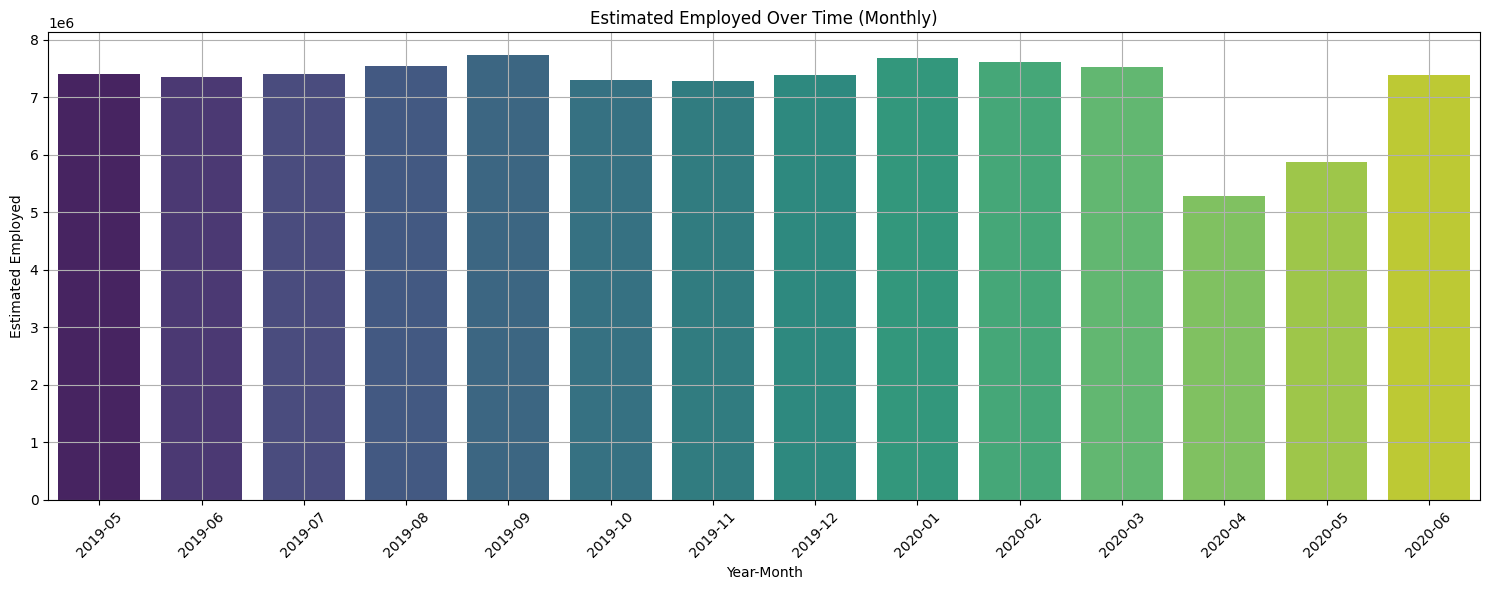

In [26]:
# Ensure 'Date' column is datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year into separate columns
data['Year_Month'] = data['Date'].dt.to_period('M')  # Creates a new column with year-month format

# Grouping the data by 'Year_Month' and calculate the mean estimated employed rate for each month
mean_employed_over_time = data.groupby('Year_Month')['Estimated Employed'].mean().reset_index()

# Creating a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='Year_Month', y='Estimated Employed', data=mean_employed_over_time, palette='viridis')
plt.xlabel('Year-Month')
plt.ylabel('Estimated Employed')
plt.title('Estimated Employed Over Time (Monthly)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Highest Employment rate was achieved in Sep 2019 followed by Jan 2020

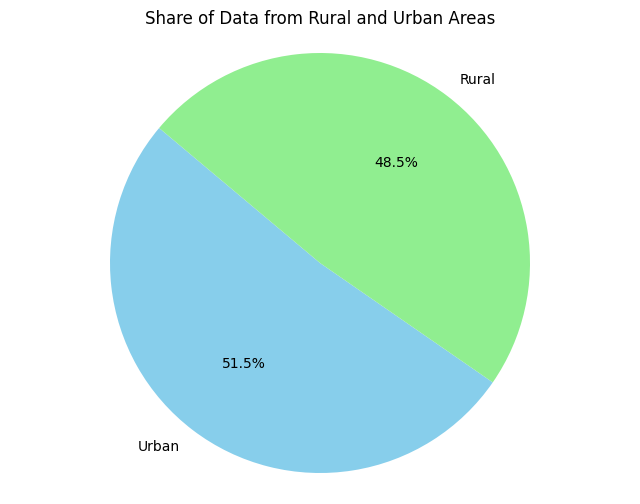

In [27]:
import matplotlib.pyplot as plt

# Calculate the number of data points for each area type
area_counts = data['Area'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Share of Data from Rural and Urban Areas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Thus the dataset is a balanced dataset which contains almost equal amount of data from the rural and urban areas


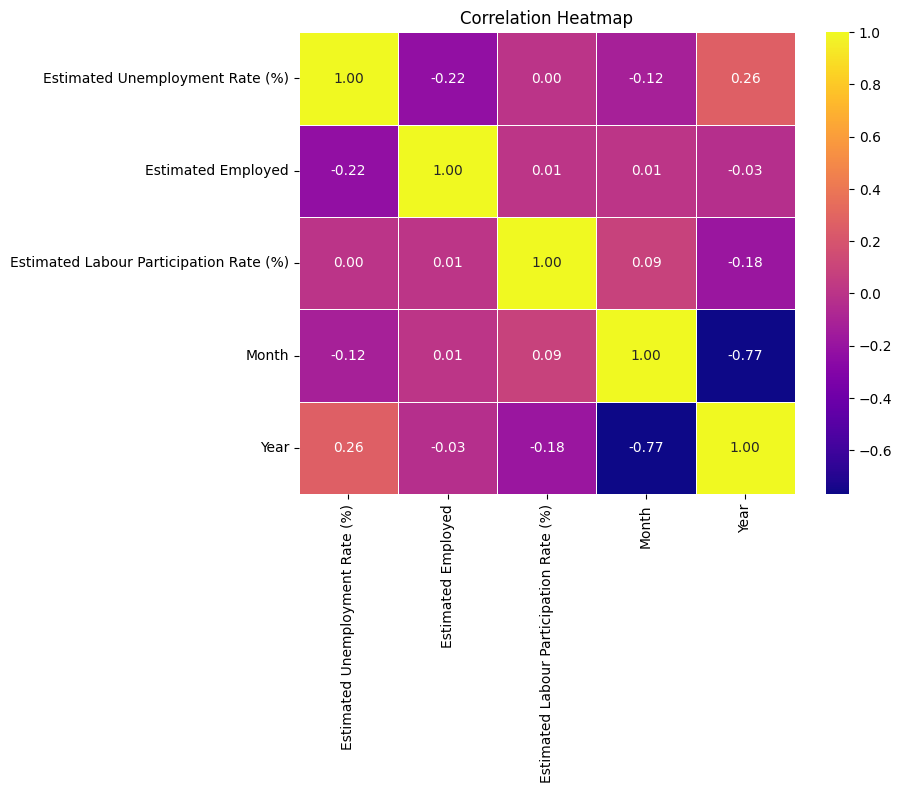

In [28]:
# Selecting relevant columns for correlation matrix
columns_of_interest = ['Estimated Unemployment Rate (%)', 'Estimated Employed',
                       'Estimated Labour Participation Rate (%)', 'Month', 'Year']

# Calculate correlation matrix
df_htmp = data[columns_of_interest].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_htmp, annot=True, cmap='plasma', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

* When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.

* The effect of year on unemployment in this dataset is clear from the correlation coeeficient.

Impact Of Lockdown

In [36]:
# Creating new dataframes for before and after lockdown period during the same months

before_lockdown = data[(data['Month'] >= 4) & (data['Month'] <= 6) & (data['Year'] == 2019)]
after_lockdown = data[(data['Month'] >= 4) & (data['Month'] <= 6) & (data['Year'] == 2020)]

In [30]:
# Calculating the mean unemployment rate before lockdown by state
bf_lockdown = before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
af_lockdown = after_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
combined_df = pd.merge(bf_lockdown, af_lockdown, on='Region')

# Renaming columns for clarity
combined_df.columns = ['Region', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']
combined_df.head()


,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,15.778333
1,Assam,6.7825,6.388000
2,Bihar,13.1650,36.988333
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,14.846667


In [37]:
# Percentage change in unemployment rate
combined_df['Rate Change in Unemployment'] = round(combined_df['Unemployment Rate After Lockdown'] - combined_df['Unemployment Rate Before Lockdown'] / combined_df['Unemployment Rate Before Lockdown'],2)
percent_change_df = combined_df.sort_values('Rate Change in Unemployment')

percent_change_df.head()


,Region,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,Rate Change in Unemployment
1,Assam,6.7825,6.388000,5.39
21,Sikkim,7.9800,6.792000,5.79
3,Chandigarh,15.3750,7.220000,6.22
26,Uttarakhand,5.0350,8.926667,7.93
16,Meghalaya,6.1125,9.086000,8.09


In [34]:
percent_change_df.columns

Index(['Region', 'Unemployment Rate Before Lockdown',
       'Unemployment Rate After Lockdown', 'Rate Change in Unemployment'],
      dtype='object')

In [38]:
# Percentage change in unemployment after lockdown

fig = px.bar(percent_change_df, x='Region',y='Rate Change in Unemployment',color='Rate Change in Unemployment',
            labels={'Region' : 'States', 'Rate Change in Unemployment' : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'rainbow', width=900, height=400)
fig.show()

Most impacted States/Union Territories

* Puducherry
* Jharkhand
* Bihar
* Haryana
* Tamil Nadu

***Observations***

*Unemployment Rate*

* Mean Unemployment Rate: 11.79%
* Median Unemployment Rate: 8.35%
* Standard Deviation of Unemployment Rate: 10.72%
* Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.
There were periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020.
* Overall unemployment rate was high for

  * Tripura
  * Haryana
  * Jharkhand
  * Bihar
* Overall Lowest unemployment rate was for

  * Meghalaya
  * Odisha
  * Assam
  * Utaarakhand
* There was extreme variablity in the unemployment rate for all the sates especially in one side (skewed).

*Labour Rate*

* Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.
* The Labour Rate is shwoing decreasing tendecy during 2020 for all the states.

*Rural vs Urban*

* The Mean and Median Unemployment rate were higher for Urban areas
* The dataset was taken almost equally from both urban and rural areas
* The Mean Unemployment Rate was higher for Urban areas
* Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.
* Urban areas had higher unemployment rate than rural areas.

*Miscellaneous*

* When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.
* The effect of year on unemployment in this dataset is clear from the correlation coeeficient

* Most impacted States/Union Territories

  * Puducherry
  * Jharkhand
  * Bihar
  * Haryana
  * Tamil Nadu